In [2]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# DATA UNDERSTANDING

In [2]:
# load the dataset
df = pd.read_csv('data/training_set_VU_DM.csv')
print("the shape of the data ",df.shape)
df.head()

the shape of the data  (4958347, 54)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

srch_id                        199795
date_time                      198615
site_id                            34
visitor_location_country_id       210
visitor_hist_starrating           312
visitor_hist_adr_usd             7799
prop_country_id                   172
prop_id                        129113
prop_starrating                     6
prop_review_score                  10
prop_brand_bool                     2
prop_location_score1              337
prop_location_score2             9342
prop_log_historical_price         392
position                           40
price_usd                       76465
promotion_flag                      2
srch_destination_id             18127
srch_length_of_stay                36
srch_booking_window               429
srch_adults_count                   9
srch_children_count                10
srch_room_count                     8
srch_saturday_night_bool            2
srch_query_affinity_score      199387
orig_destination_distance      530595
random_bool 

array([[<AxesSubplot:title={'center':'srch_id'}>,
        <AxesSubplot:title={'center':'site_id'}>,
        <AxesSubplot:title={'center':'visitor_location_country_id'}>,
        <AxesSubplot:title={'center':'visitor_hist_starrating'}>,
        <AxesSubplot:title={'center':'visitor_hist_adr_usd'}>,
        <AxesSubplot:title={'center':'prop_country_id'}>,
        <AxesSubplot:title={'center':'prop_id'}>],
       [<AxesSubplot:title={'center':'prop_starrating'}>,
        <AxesSubplot:title={'center':'prop_review_score'}>,
        <AxesSubplot:title={'center':'prop_brand_bool'}>,
        <AxesSubplot:title={'center':'prop_location_score1'}>,
        <AxesSubplot:title={'center':'prop_location_score2'}>,
        <AxesSubplot:title={'center':'prop_log_historical_price'}>,
        <AxesSubplot:title={'center':'position'}>],
       [<AxesSubplot:title={'center':'price_usd'}>,
        <AxesSubplot:title={'center':'promotion_flag'}>,
        <AxesSubplot:title={'center':'srch_destination_id'}>,

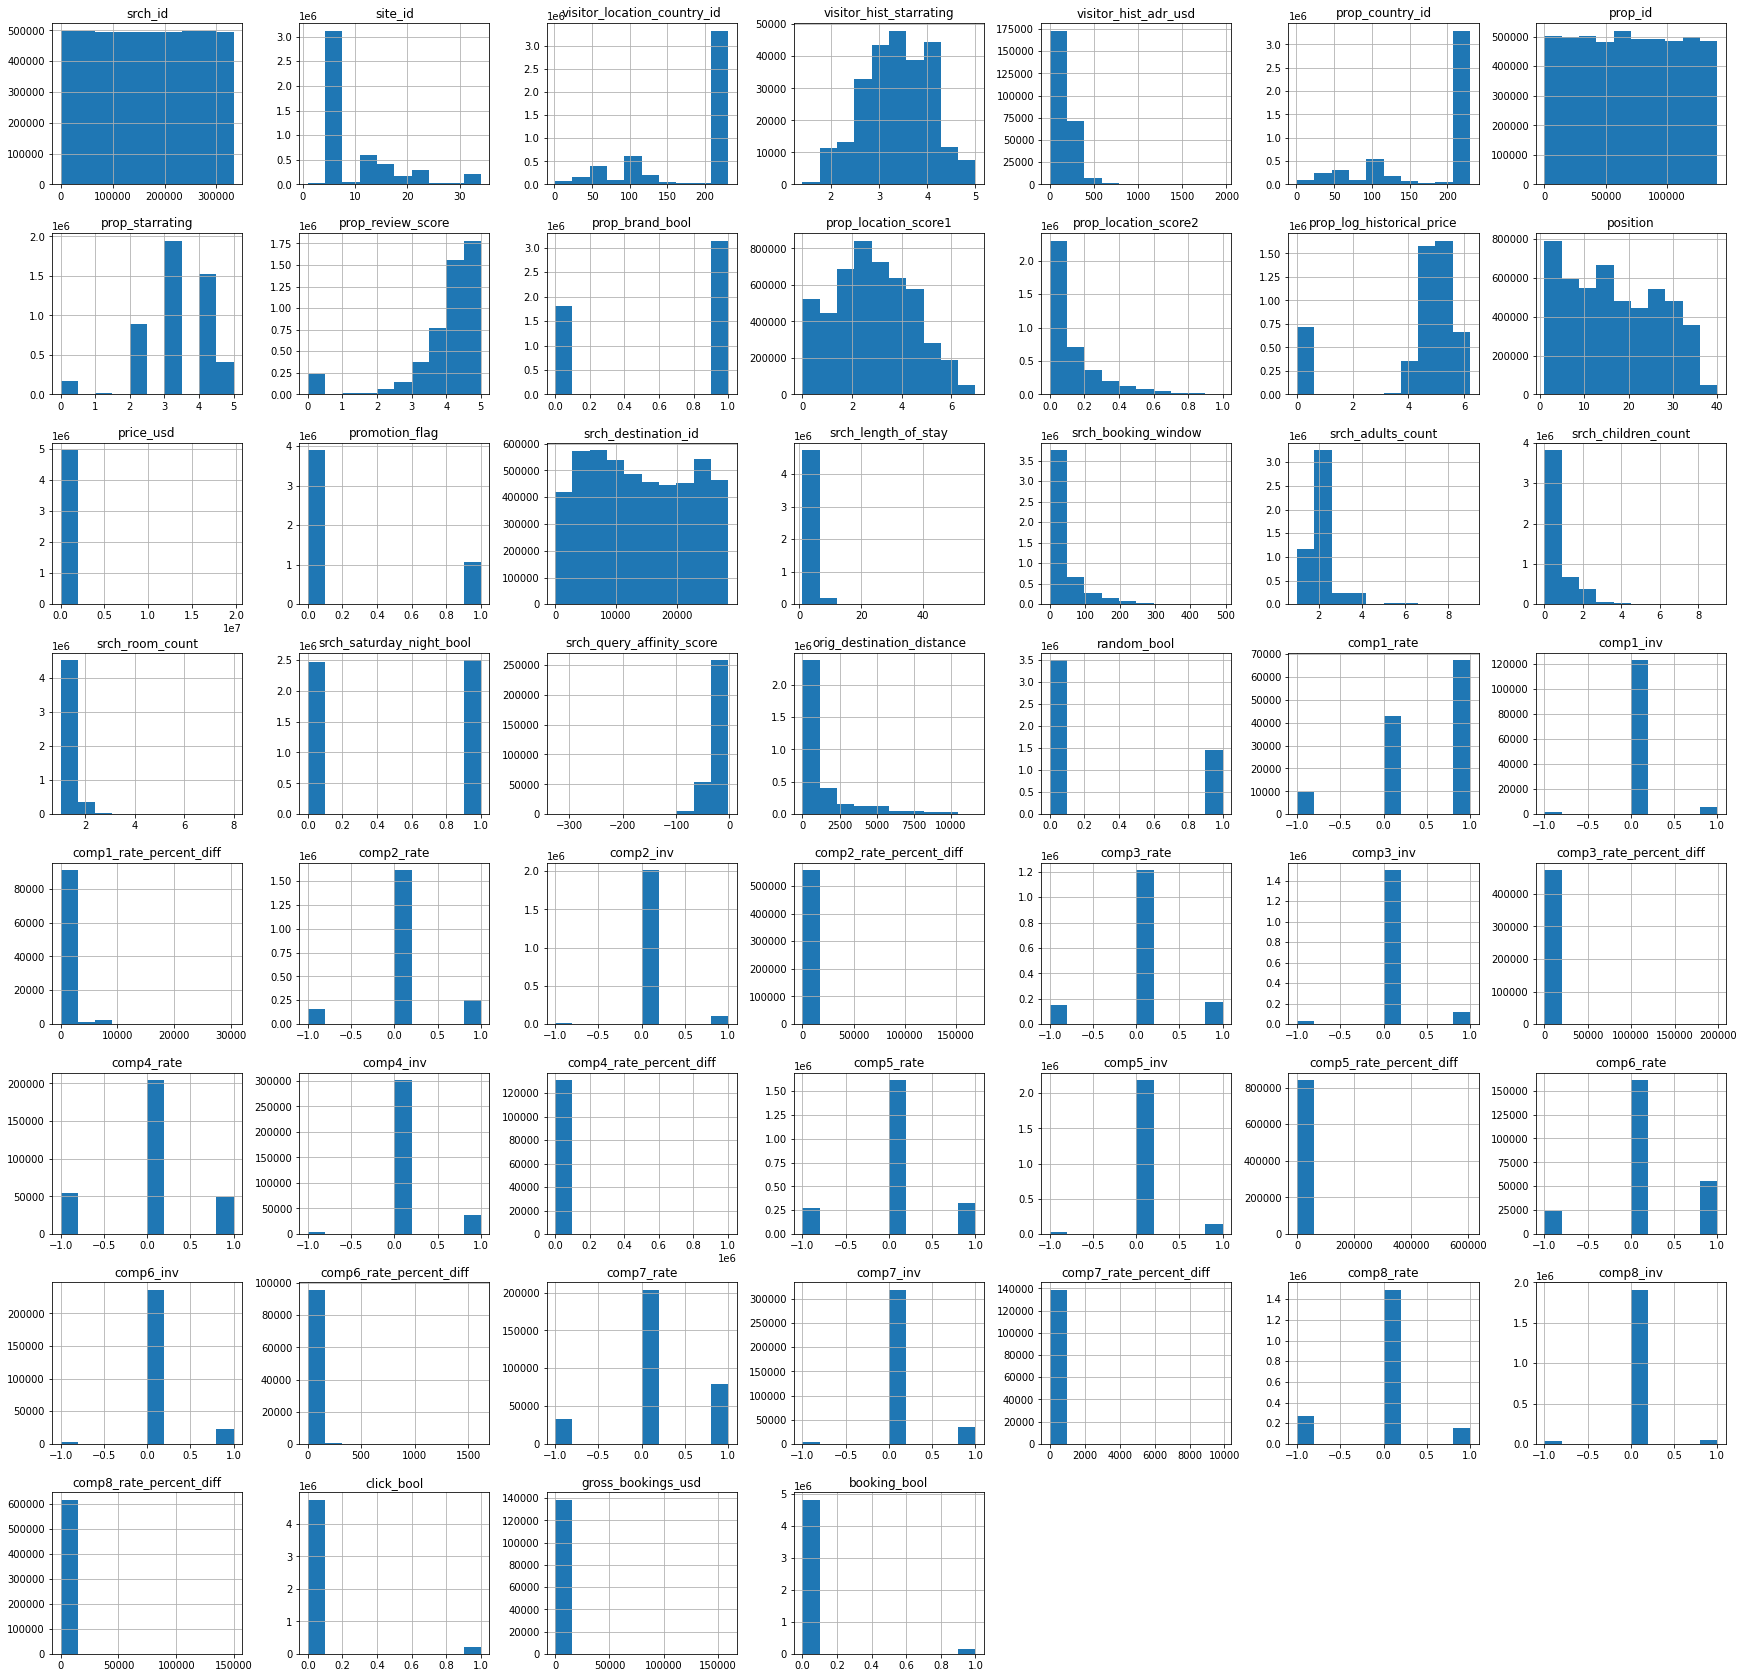

In [6]:
# Calculate the record count and unique value count for each variable
variable_counts = df.nunique()

# Print the record count and unique value count for each variable
print(variable_counts)

# Plot histograms for numeric variables
df[df.columns].hist(figsize=(30, 30))

## Missing value

In [7]:
# Check for missing values
null_counts = df.isnull().sum()
print(null_counts)

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [8]:
# Calculate the percentage of missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent)

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.920364
visitor_hist_adr_usd           94.897735
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

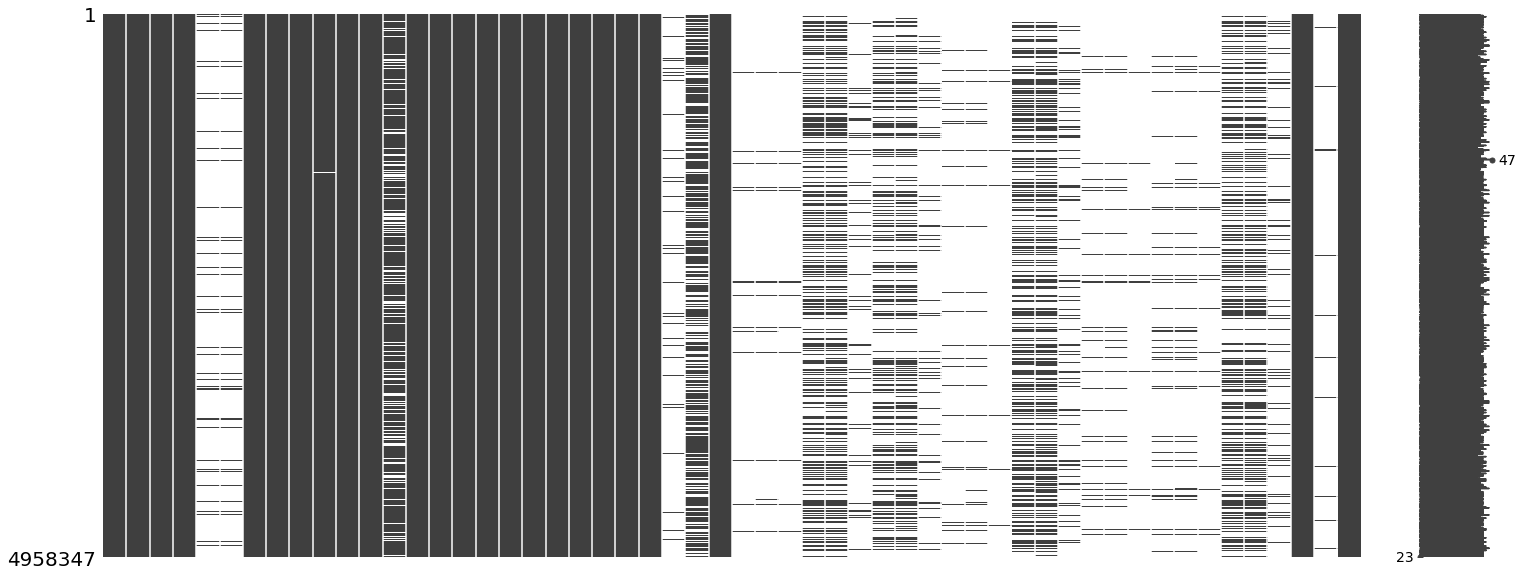

In [9]:
# Plot the missing value matrix
msno.matrix(df)
plt.show()

In [10]:
# Delete columns with a large number of missing values
threshold = 0.5  # Set threshold to 50%
df_cleaned = df.dropna(thresh=threshold * len(df), axis=1)

# Print the cleaned DataFrame
df_cleaned.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,1,0,4,0,1,1,NaN,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,1,0,4,0,1,1,NaN,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,1,0,4,0,1,1,NaN,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,1,0,4,0,1,1,NaN,1,0,0


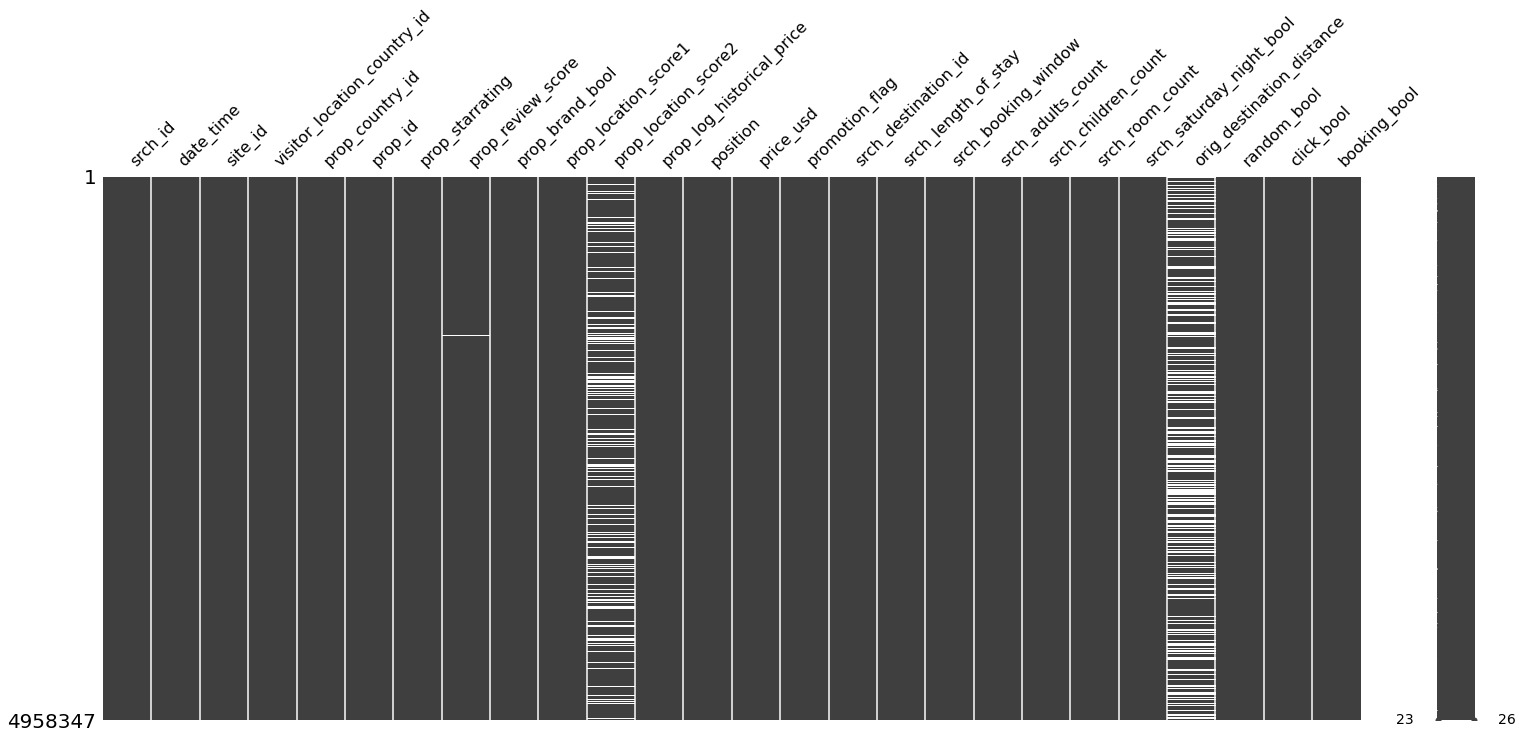

In [11]:
msno.matrix(df_cleaned)
plt.show()

In [12]:
# Observe the percentage of missing values after filtering
missing_percent_1 = df_cleaned.isnull().mean() * 100
print(missing_percent_1)

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
orig_destination_distance      32.425766
random_bool                     0.000000
click_bool      

## Correlation matrix

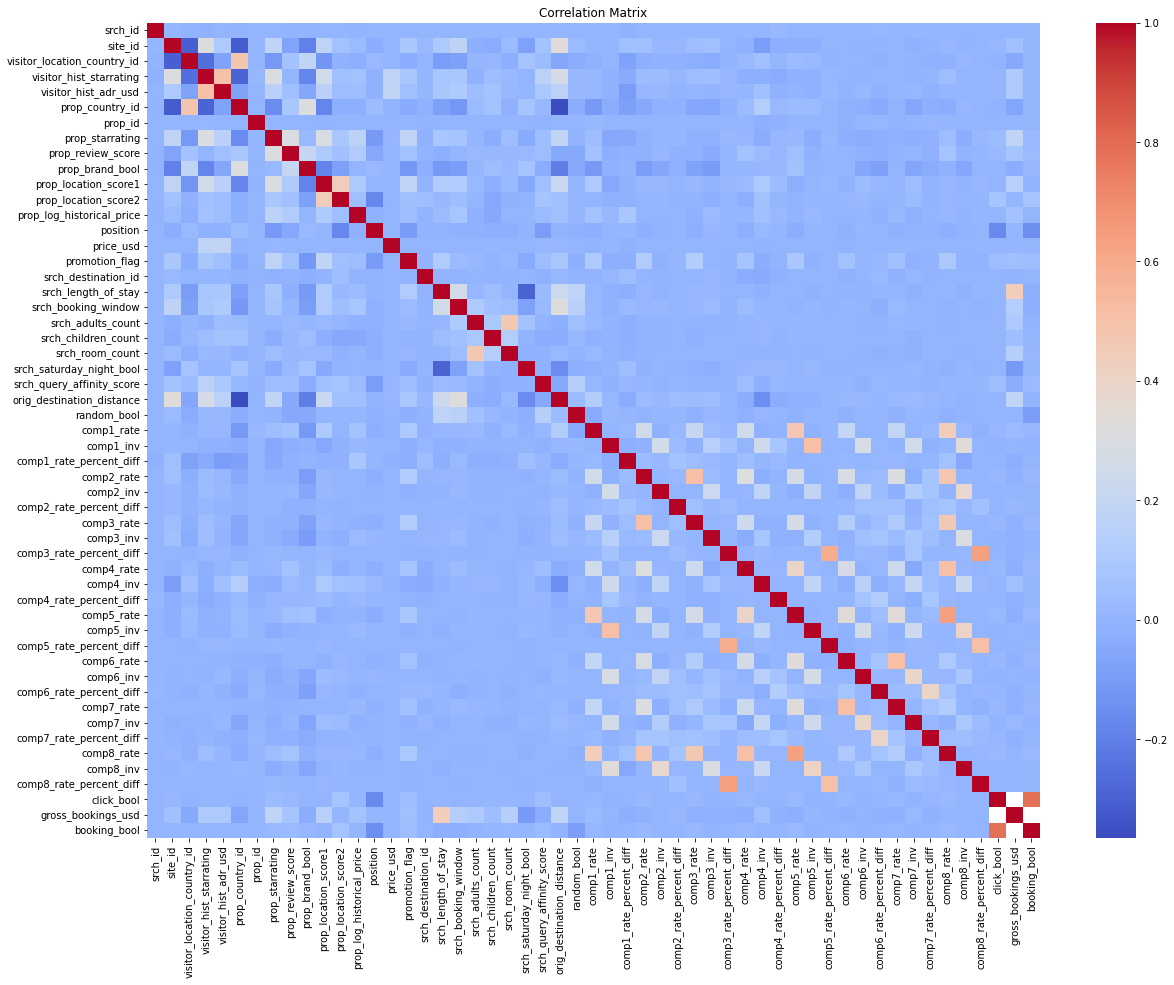

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Outlier detection

In [16]:
print(df.dtypes)

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

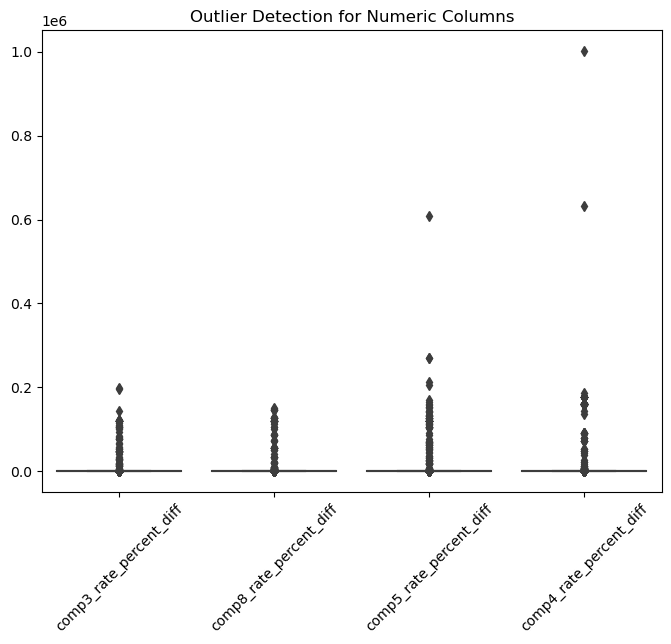

In [9]:
# Select the numeric columns for outlier detection
numeric_columns_1 = ['comp3_rate_percent_diff',
            'comp8_rate_percent_diff','comp5_rate_percent_diff','comp4_rate_percent_diff']


plt.figure(figsize=(8, 6))
sns.boxplot(df[numeric_columns_1])
plt.xticks(rotation=45)
plt.title('Outlier Detection for Numeric Columns')
plt.show()

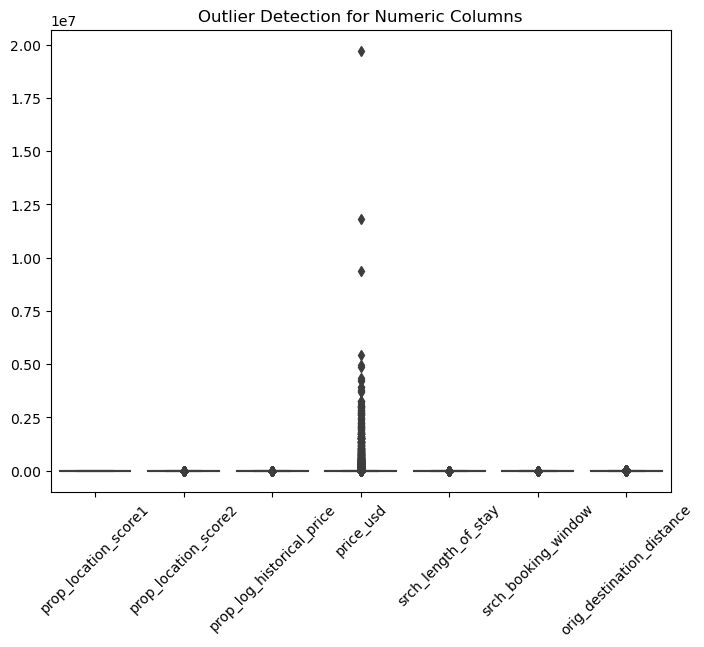

In [11]:
# Outlier detection
numeric_columns_2 = ['prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 'srch_length_of_stay',
               'srch_booking_window', 'orig_destination_distance']

plt.figure(figsize=(8, 6))
sns.boxplot(df[numeric_columns_2])
plt.xticks(rotation=45)
plt.title('Outlier Detection for Numeric Columns')
plt.show()

In [6]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


## Observing data insights

In [12]:
# How many unique user
print(f"Check How many unique user \n{len(df['srch_id'].unique())}\n")

# How many unique prop_id
print(f"Check How many unique prop_id \n{len(df['prop_id'].unique())}\n")

# Full rating matrix will have
print(f"Full rating matrix will have \n{len(df['prop_id'].unique())*len(df['prop_id'].unique())} elements \n") 

# Check the distribution of the booking_bool variable
print(f"Check the distribution of the booking_bool variable \n{df['booking_bool'].value_counts()}\n")

# Check the distribution of the click_bool variable
print(f"Check the distribution of the click_bool variable \n{df['click_bool'].value_counts()}\n")

# Check the distribution of the visitor_location_country_id 
print(f"Check the distribution of the visitor_location_country_id \n{df['visitor_location_country_id'].value_counts().head()}\n")

# Check the distribution of the visitor_hist_starrating 
print(f"Check the distribution of the visitor_hist_starrating \n{df['visitor_hist_starrating'].value_counts().head()}\n")

# Average visitor_hist_starrating for each srch_id
print(f"average visitor_hist_starrating for each srch_id \n{df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna().head()}\n")

# Average visitor_location_country_id for each srch_id
print(f"average visitor_location_country_id for each srch_id \n{df.groupby('srch_id')['visitor_location_country_id'].mean().dropna().head()}\n")

Check How many unique user 
199795

Check How many unique prop_id 
129113

Full rating matrix will have 
16670166769 elements 

Check the distribution of the booking_bool variable 
booking_bool
0    4819957
1     138390
Name: count, dtype: int64

Check the distribution of the click_bool variable 
click_bool
0    4736468
1     221879
Name: count, dtype: int64

Check the distribution of the visitor_location_country_id 
visitor_location_country_id
219    2892489
100     495476
55      290461
216     217385
220     174296
Name: count, dtype: int64

Check the distribution of the visitor_hist_starrating 
visitor_hist_starrating
4.0    23416
3.0    20879
3.5    17088
2.5    10534
2.0     9157
Name: count, dtype: int64

average visitor_hist_starrating for each srch_id 
srch_id
47     4.31
49     2.50
80     2.50
87     3.74
108    3.35
Name: visitor_hist_starrating, dtype: float64

average visitor_location_country_id for each srch_id 
srch_id
1     187.0
4     219.0
6     100.0
8     219.0
11 

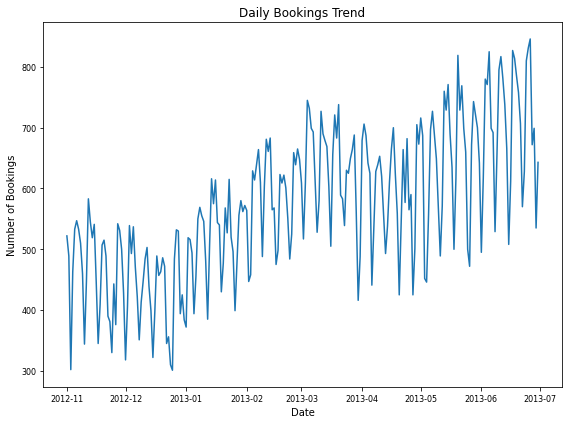

In [18]:
# plot the trend of room bookings over time
df['date_time'] = pd.to_datetime(df['date_time'])
daily_bookings = df.groupby(df['date_time'].dt.date)['booking_bool'].sum()

plt.figure(figsize=(8, 6))
plt.plot(daily_bookings.index, daily_bookings.values)
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.title('Daily Bookings Trend')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

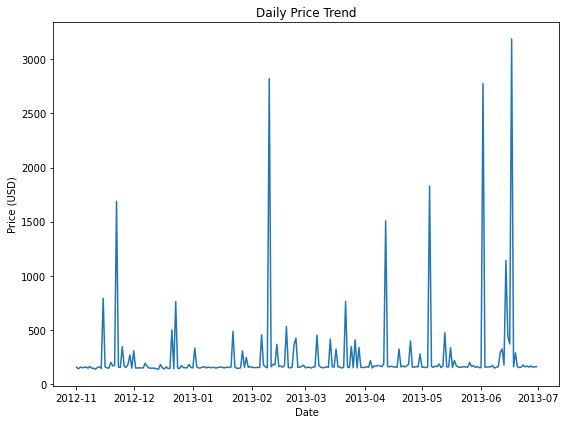

In [19]:
# Plot the trend of average daily prices over time
df['date_time'] = pd.to_datetime(df['date_time'])
daily_prices = df.groupby(df['date_time'].dt.date)['price_usd'].mean()

# Plot the curve of price changing over time
plt.figure(figsize=(8, 6))
plt.plot(daily_prices.index, daily_prices.values)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Daily Price Trend')
#plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

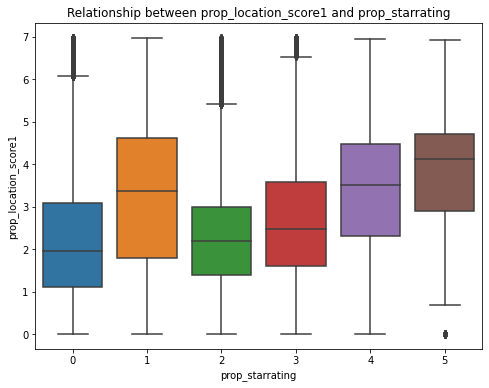

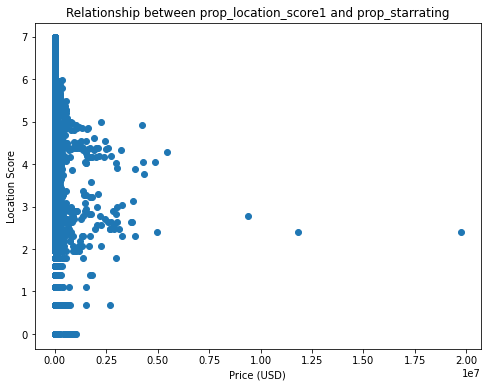

In [20]:
# Relationship between hotel attraction score 1 and hotel star rating
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['prop_starrating'], y=df['prop_location_score1'])
plt.xlabel('prop_starrating')
plt.ylabel('prop_location_score1')
plt.title('Relationship between prop_location_score1 and prop_starrating')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['price_usd'], df['prop_location_score1'])
plt.xlabel('Price (USD)')
plt.ylabel('Location Score')
plt.title('Relationship between prop_location_score1 and prop_starrating')
plt.show()

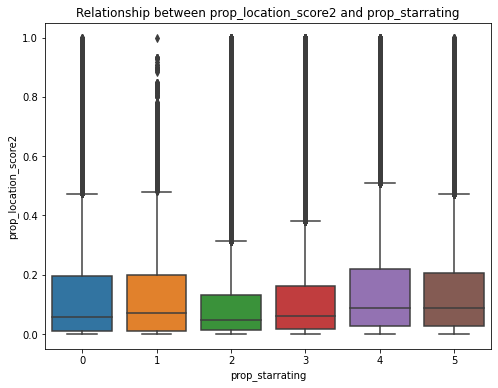

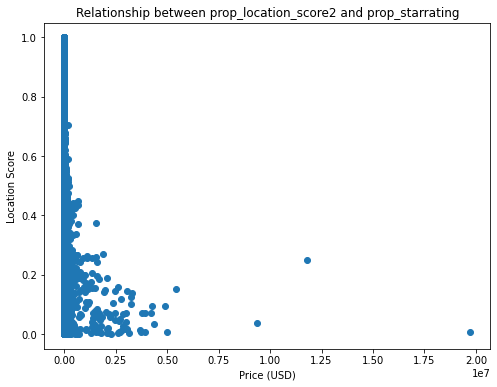

In [21]:
# Relationship between hotel attraction score 2 and hotel star rating
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['prop_starrating'], y=df['prop_location_score2'])
plt.xlabel('prop_starrating')
plt.ylabel('prop_location_score2')
plt.title('Relationship between prop_location_score2 and prop_starrating')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['price_usd'], df['prop_location_score2'])
plt.xlabel('Price (USD)')
plt.ylabel('Location Score')
plt.title('Relationship between prop_location_score2 and prop_starrating')
plt.show()

In [22]:
print(df['promotion_flag'].value_counts())
print(df['booking_bool'].value_counts())

0    3889229
1    1069118
Name: promotion_flag, dtype: int64
0    4819957
1     138390
Name: booking_bool, dtype: int64


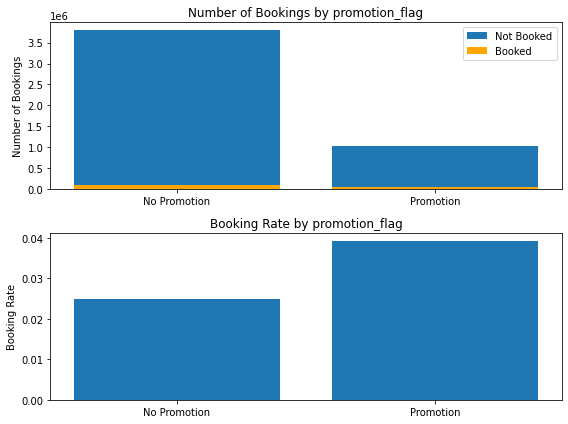

In [23]:
# Relationship between pre-order quantity and probability and promotion_flag
booking_counts = df.groupby('promotion_flag')['booking_bool'].sum()
non_booking_counts = df.groupby('promotion_flag')['booking_bool'].count() - booking_counts
booking_rate = df.groupby('promotion_flag')['booking_bool'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
# Set the first subgraph
ax1.bar(booking_counts.index, non_booking_counts.values, label='Not Booked')
ax1.bar(booking_counts.index, booking_counts.values, label='Booked', color='orange')
ax1.set_xticks(booking_counts.index)
ax1.set_xticklabels(['No Promotion', 'Promotion'])
ax1.set_ylabel('Number of Bookings')
ax1.set_title('Number of Bookings by promotion_flag')
ax1.legend()

# Set the second subgraph
ax2.bar(booking_rate.index, booking_rate.values)
ax2.set_xticks(booking_rate.index)
ax2.set_xticklabels(['No Promotion', 'Promotion'])
ax2.set_ylabel('Booking Rate')
ax2.set_title('Booking Rate by promotion_flag')

plt.tight_layout()
plt.show()


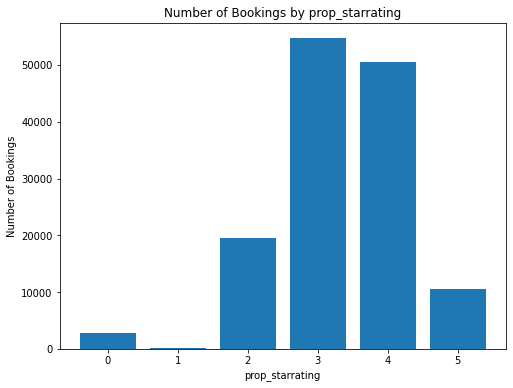

In [24]:
# Number of Bookings by prop_starrating
booking_counts = df.groupby('prop_starrating')['booking_bool'].sum()
booking_rate = df.groupby('promotion_flag')['booking_bool'].mean()

plt.figure(figsize=(8, 6))
plt.bar(booking_counts.index, booking_counts.values)
plt.xlabel('prop_starrating')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by prop_starrating')
plt.show()


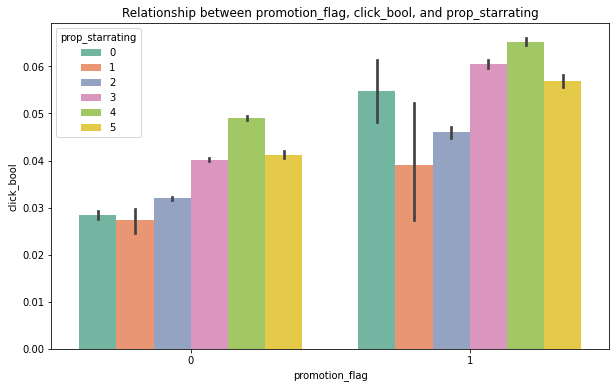

In [26]:
# Click_bool Relationship with other factors
factors = ['prop_starrating', 'prop_review_score', 'promotion_flag', 'price_usd', 'random_bool', 'prop_brand_bool']

# Add click_bool column as hue parameter
df['click_bool'] = df['click_bool'].astype(int)

# Plot click_bool, promotion_flag, and prop_starrating
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='promotion_flag', y='click_bool', hue='prop_starrating', palette='Set2')
plt.xlabel('promotion_flag')
plt.ylabel('click_bool')
plt.title('Relationship between promotion_flag, click_bool, and prop_starrating')
plt.legend(title='prop_starrating')
plt.show()

# Each bar represents a value of promotion_flag, and the height of each bar represents the mean value of click_bool under corresponding promotion_flag.


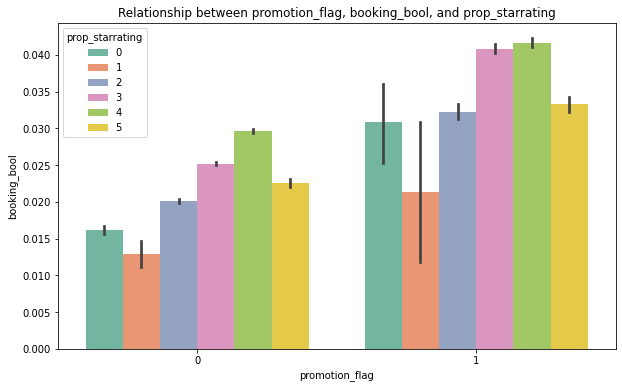

In [27]:
# booking_bool Relationship with other factors
factors = ['prop_starrating', 'prop_review_score', 'promotion_flag', 'price_usd', 'random_bool', 'prop_brand_bool']

df['booking_bool'] = df['booking_bool'].astype(int)

# Plot the relationship between book_bool, promotion_flag, and prop_starrating
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='promotion_flag', y='booking_bool', hue='prop_starrating', palette='Set2')
plt.xlabel('promotion_flag')
plt.ylabel('booking_bool')
plt.title('Relationship between promotion_flag, booking_bool, and prop_starrating')
plt.legend(title='prop_starrating')
plt.show()

# Each bar represents a value of promotion_flag, and the height of each bar represents the mean value of click_bool under corresponding promotion_flag.

In [28]:
print(df['click_bool'].value_counts())

0    4736468
1     221879
Name: click_bool, dtype: int64


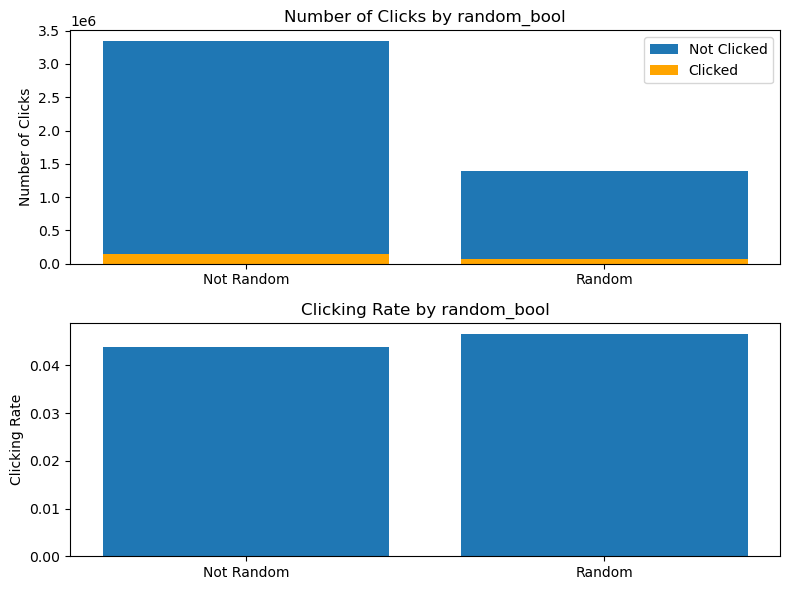

In [32]:
# Relationship between clicks and random_bool
click_counts = df.groupby('random_bool')['click_bool'].sum()
non_click_counts = df.groupby('random_bool')['click_bool'].count() - click_counts
click_rate = df.groupby('random_bool')['click_bool'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.bar( non_click_counts.index, non_click_counts.values, label='Not Clicked')
ax1.bar(click_counts.index, click_counts.values, label='Clicked', color='orange')
ax1.set_xticks(click_counts.index)
ax1.set_xticklabels(['Not Random', 'Random'])
ax1.set_ylabel('Number of Clicks')
ax1.set_title('Number of Clicks by random_bool')
ax1.legend()

ax2.bar(click_rate.index, click_rate.values)
ax2.set_xticks(click_rate.index)
ax2.set_xticklabels(['Not Random', 'Random'])
ax2.set_ylabel('Clicking Rate')
ax2.set_title('Clicking Rate by random_bool')

plt.tight_layout()
plt.show()


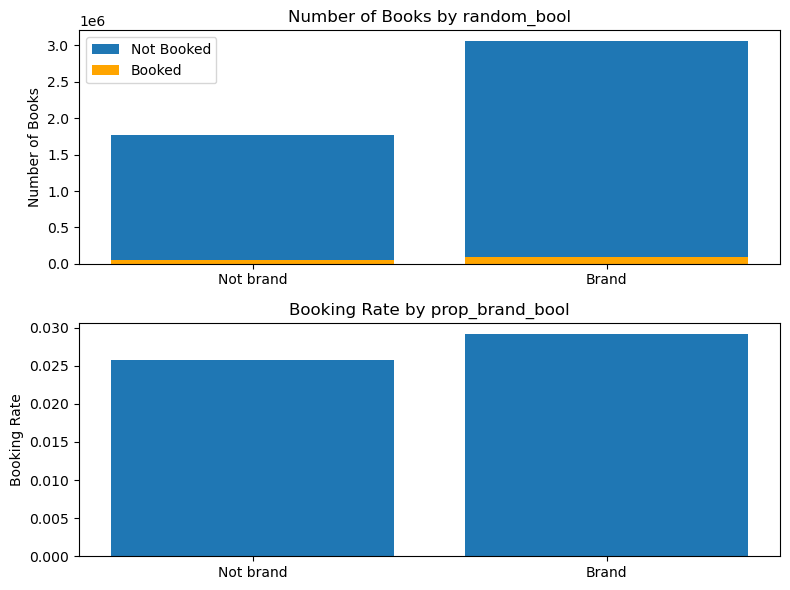

In [31]:
# Relationship between books and random_bool
booking_counts = df.groupby('prop_brand_bool')['booking_bool'].sum()
non_booking_counts = df.groupby('prop_brand_bool')['booking_bool'].count() - booking_counts
booking_rate = df.groupby('prop_brand_bool')['booking_bool'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.bar(booking_counts.index, non_booking_counts.values, label='Not Booked')
ax1.bar(booking_counts.index, booking_counts.values, label='Booked', color='orange')
ax1.set_xticks(booking_counts.index)
ax1.set_xticklabels(['Not brand', 'Brand'])
ax1.set_ylabel('Number of Books')
ax1.set_title('Number of Books by random_bool')
ax1.legend()

ax2.bar(booking_rate.index, booking_rate.values)
ax2.set_xticks(booking_rate.index)
ax2.set_xticklabels(['Not brand', 'Brand'])
ax2.set_ylabel('Booking Rate')
ax2.set_title('Booking Rate by prop_brand_bool')

plt.tight_layout()
plt.show()

In [36]:
# spilt the data based on click_bool
click_bool_1 = df[df['click_bool'] == 1]
click_bool_0 = df[df['click_bool'] == 0]

# spilt the data +1 when the displayed sort was random, 0 when the normal sort order was displayed
display_order = click_bool_1[click_bool_1['random_bool'] == 0]
display_random = click_bool_1[click_bool_1['random_bool'] == 1]

# spilt the data if a property is part of a brand or not  
brand_display_order = display_order[display_order['prop_brand_bool'] == 1]
not_brand_display_order = display_order[display_order['prop_brand_bool'] == 0]

brand_display_random = display_random[display_random['prop_brand_bool'] == 1]
not_brand_display_random = display_random[display_random['prop_brand_bool'] == 0]

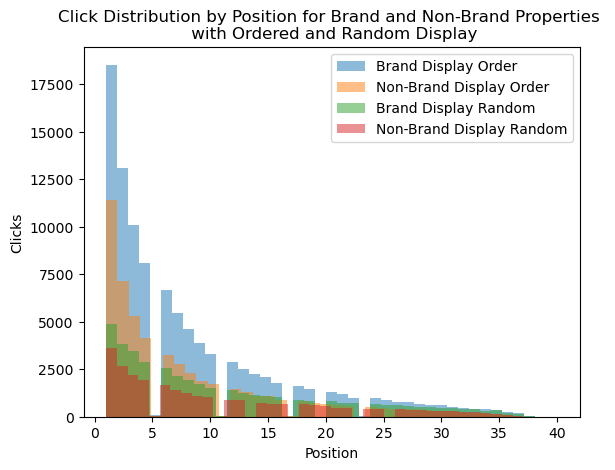

In [9]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['position'], bins=40, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['position'], bins=40, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['position'], bins=40, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['position'], bins=40, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Position')
plt.ylabel('Clicks')
plt.legend()
plt.title('Click Distribution by Position for Brand and Non-Brand Properties \n with Ordered and Random Display')

# Show the plot
plt.show()

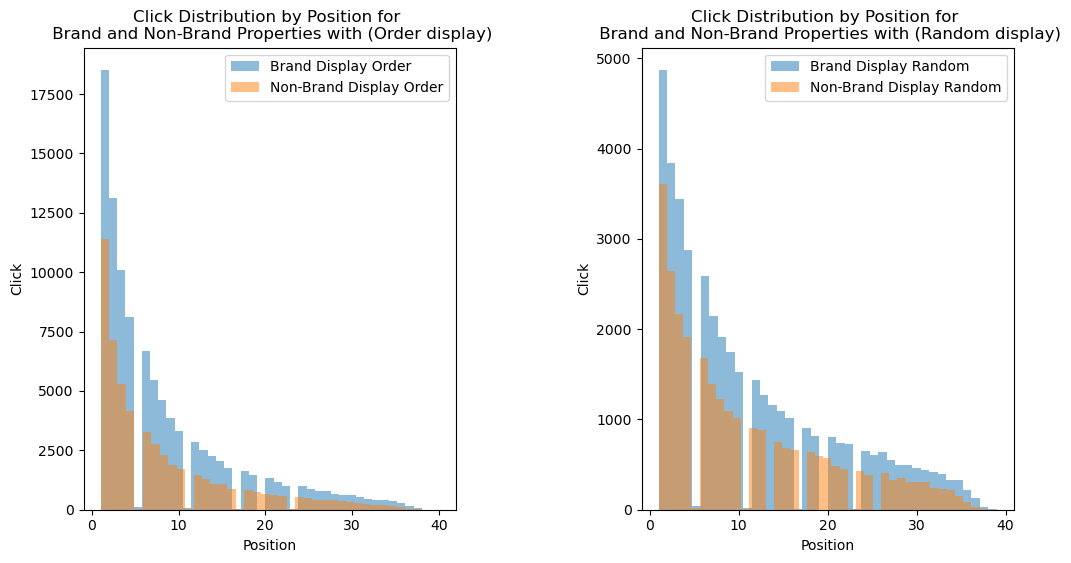

In [10]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'], bins=bins, label='Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'], bins=bins, label='Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click Distribution by Position for \n Brand and Non-Brand Properties with (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'], bins=bins, label='Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'], bins=bins, label='Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click Distribution by Position for \n Brand and Non-Brand Properties with (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

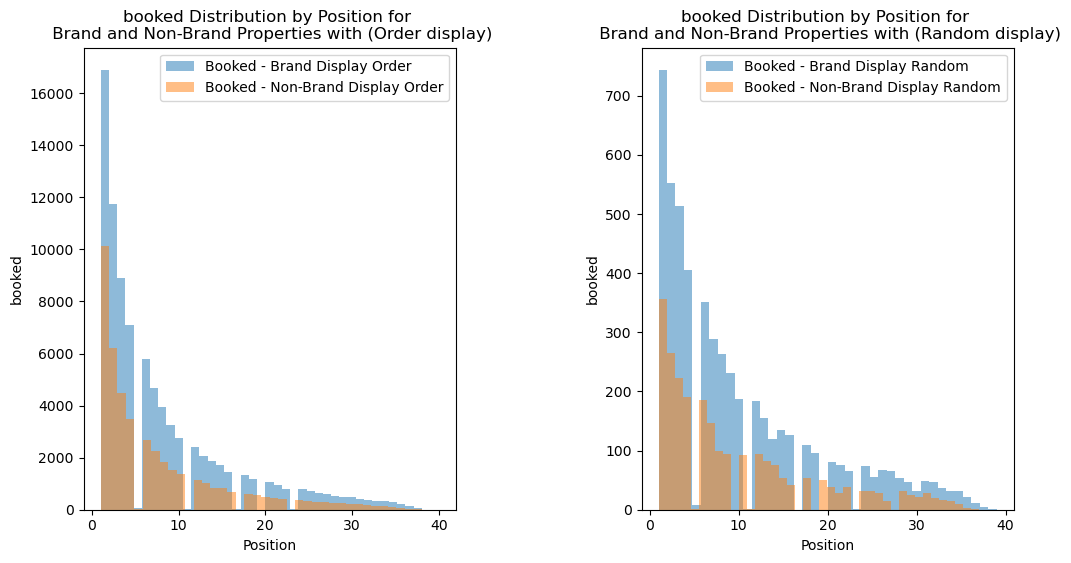

In [11]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('booked')
axes[0].set_title('booked Distribution by Position for \n Brand and Non-Brand Properties with (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 1], bins=bins, label='Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('booked')
axes[1].set_title('booked Distribution by Position for \n Brand and Non-Brand Properties with (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

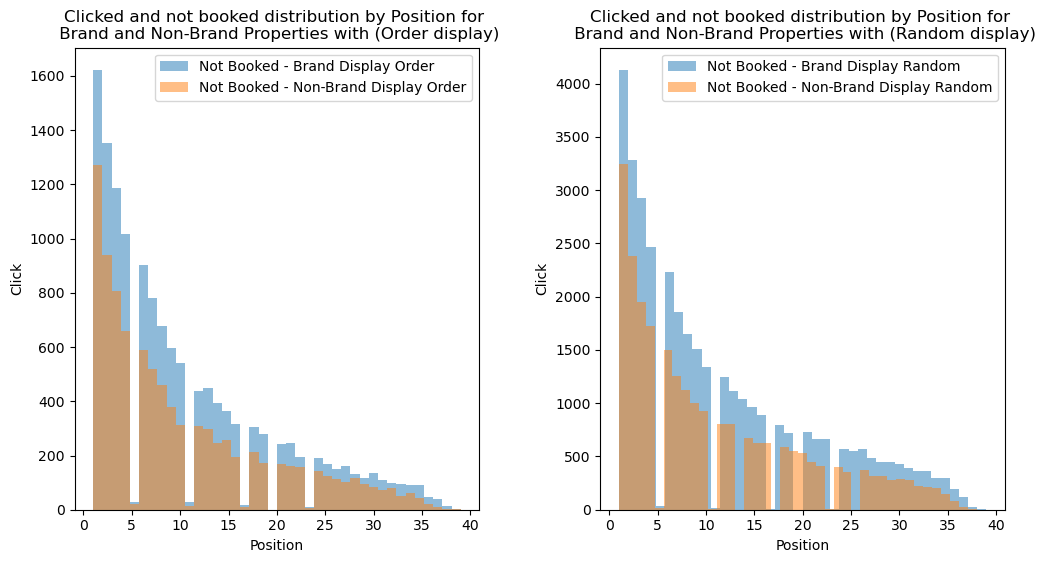

In [12]:
# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
axes[0].hist(brand_display_order['position'][brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Order', alpha=0.5)
axes[0].hist(not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Order', alpha=0.5)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Clicked and not booked distribution by Position for \n Brand and Non-Brand Properties with (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
axes[1].hist(brand_display_random['position'][brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Brand Display Random', alpha=0.5)
axes[1].hist(not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 0], bins=bins, label='Not Booked - Non-Brand Display Random', alpha=0.5)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Clicked and not booked distribution by Position for \n Brand and Non-Brand Properties with (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

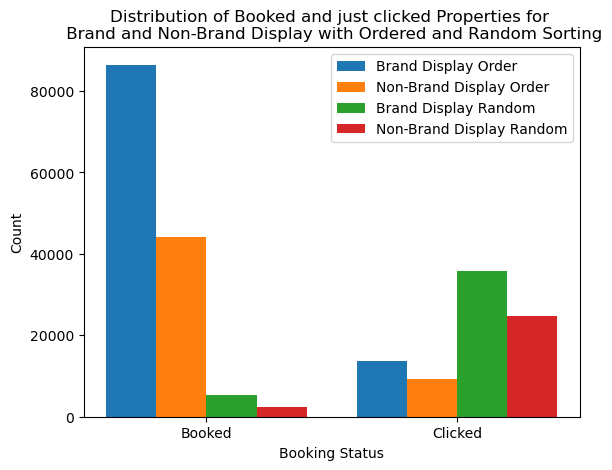

In [13]:
# Count the number of booked and not booked properties for each category
brand_display_order_counts = brand_display_order['booking_bool'].value_counts()
not_brand_display_order_counts = not_brand_display_order['booking_bool'].value_counts()
brand_display_random_counts = brand_display_random['booking_bool'].value_counts()
not_brand_display_random_counts = not_brand_display_random['booking_bool'].value_counts()

# Define the x positions for the bars
bar_width = 0.2
index = np.arange(2)

# Create a bar plot
plt.bar(index, [brand_display_order_counts[1], brand_display_order_counts[0]],width=bar_width, label='Brand Display Order')
plt.bar(index + bar_width, [not_brand_display_order_counts[1], not_brand_display_order_counts[0]],width=bar_width, label='Non-Brand Display Order')
plt.bar(index +2* bar_width,[brand_display_random_counts[1], brand_display_random_counts[0]],width=bar_width, label='Brand Display Random')
plt.bar(index +3* bar_width,[not_brand_display_random_counts[1], not_brand_display_random_counts[0]],width=bar_width, label='Non-Brand Display Random')

# Customize the plot
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(index + 1.5 * bar_width, ['Booked','Clicked'])
plt.legend()
plt.title('Distribution of Booked and just clicked Properties for \n Brand and Non-Brand Display with Ordered and Random Sorting')
# Show the plot
plt.show()

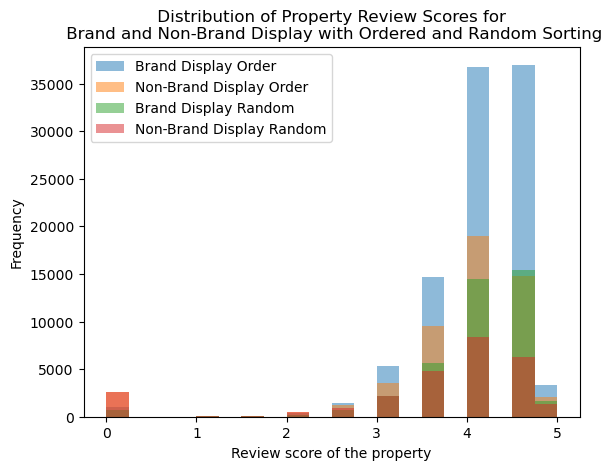

In [14]:
# Plotting all distributions in a single plot
plt.hist(brand_display_order['prop_review_score'], bins=20, label='Brand Display Order', alpha=0.5)
plt.hist(not_brand_display_order['prop_review_score'], bins=20, label='Non-Brand Display Order', alpha=0.5)
plt.hist(brand_display_random['prop_review_score'], bins=20, label='Brand Display Random', alpha=0.5)
plt.hist(not_brand_display_random['prop_review_score'], bins=20, label='Non-Brand Display Random', alpha=0.5)

# Customize the plot
plt.xlabel('Review score of the property')
plt.ylabel('Frequency')
plt.legend()
plt.title(' Distribution of Property Review Scores for \n Brand and Non-Brand Display with Ordered and Random Sorting')

# Show the plot
plt.show()

promotion_flag
0    96443
1    41947
Name: booking_bool, dtype: int64
promotion_flag
0    0.024797
1    0.039235
Name: booking_bool, dtype: float64


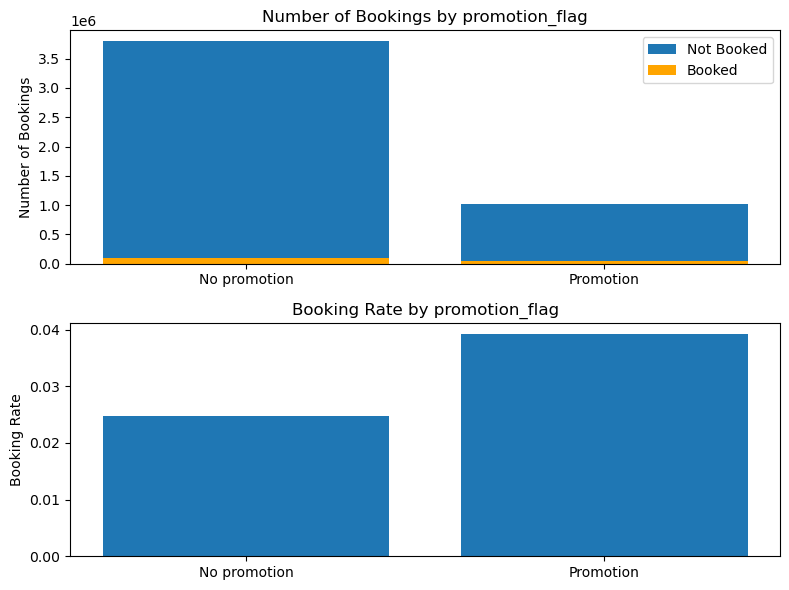

In [49]:
# Relationship between clicks and random_bool
booking_counts = df.groupby('promotion_flag')['booking_bool'].sum()

non_book_counts = df.groupby('promotion_flag')['booking_bool'].count() - booking_counts
booking_rate = df.groupby('promotion_flag')['booking_bool'].mean()
print(booking_rate)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.bar( non_book_counts.index, non_book_counts.values, label='Not Booked')
ax1.bar(booking_counts.index, booking_counts.values, label='Booked', color='orange')
ax1.set_xticks(booking_counts.index)
ax1.set_xticklabels(['No promotion', 'Promotion'])
ax1.set_ylabel('Number of Bookings')
ax1.set_title('Number of Bookings by promotion_flag')
ax1.legend()

ax2.bar(booking_rate.index, booking_rate.values)
ax2.set_xticks(booking_rate.index)
ax2.set_xticklabels(['No promotion', 'Promotion'])
ax2.set_ylabel('Booking Rate')
ax2.set_title('Booking Rate by promotion_flag')

plt.tight_layout()
plt.show()